In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [19]:
data = {
    'kilometers': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
    'petrol_consumption': [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,0.66,0.7,0.77,0.8,0.88,0.9,0.99,1.0,1.11,2.0,2.22,3.0,3.11,4.0,4.44,5.0,5.55,6.0,6.66,7.0],
    'fares': [7, 9, 10, 12, 13, 15, 16, 18, 19, 21,22,22,24,24,25,25,27,27,28,28,30,30,31,31,33,33,34,34,35,35] 
}
print(data)

{'kilometers': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'petrol_consumption': [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.66, 0.7, 0.77, 0.8, 0.88, 0.9, 0.99, 1.0, 1.11, 2.0, 2.22, 3.0, 3.11, 4.0, 4.44, 5.0, 5.55, 6.0, 6.66, 7.0], 'fares': [7, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 22, 24, 24, 25, 25, 27, 27, 28, 28, 30, 30, 31, 31, 33, 33, 34, 34, 35, 35]}


In [20]:
# Separate the features (kilometers, petrol consumption) and target (price)
X = df[['kilometers', 'petrol_consumption']]  # Features
y = df['fares']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)


In [23]:
# Example: Predict the price for 5 kilometers and 0.35 liters petrol consumption
km_petrol = np.array([[5, 0.66]])
km_petrol_scaled = scaler.transform(km_petrol)
predicted_price = model.predict(km_petrol_scaled)

print(f"Predicted Price for 5 kilometers and 0.35 liters petrol: ₹{predicted_price[0]:.2f}")


Predicted Price for 5 kilometers and 0.35 liters petrol: ₹90.21


n:\()()()()()()()()\IBM-Z-Datathon---ML-model-for-Transportation\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Root Mean Squared Error (RMSE): 9.38


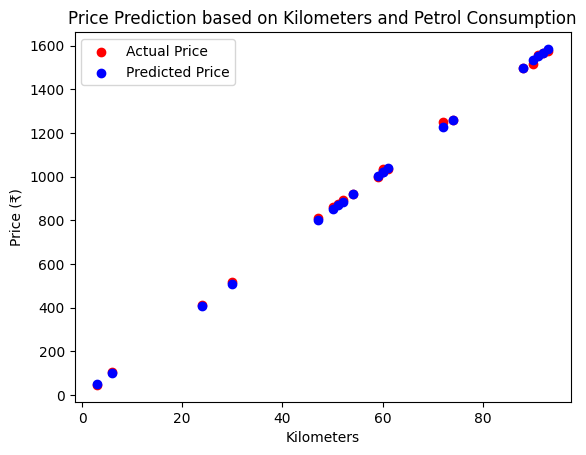

In [24]:
# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualizing the results
plt.scatter(X_test['kilometers'], y_test, color='red', label='Actual Price')
plt.scatter(X_test['kilometers'], y_pred, color='blue', label='Predicted Price')
plt.title('Price Prediction based on Kilometers and Petrol Consumption')
plt.xlabel('Kilometers')
plt.ylabel('Price (₹)')
plt.legend()
plt.show()
